<a href="https://colab.research.google.com/github/LeonardoGastaldo/labo2025v/blob/main/src/workflows/EntregaFinal/Test%20de%20Wilcoxon_model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comenzando... Limpiando la memoria

In [1]:
# limpio la memoria
rm(list=ls(all.names=TRUE)) # remove all objects
gc(full=TRUE, verbose=FALSE) # garbage collection

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,657218,35.1,1454491,77.7,1325429,70.8
Vcells,1220160,9.4,8388608,64.0,1975136,15.1


### Vectores con Ganancias promedio
Se genera un vector por cada una de las Ganancias obtenidas para los 5 experimentos realizados con diferentes semillas y cada uno de los cortes de envío a Kaggle para el codigo WorkFlow Baseline.

*Es solo para saber si hay algún envío mejores que los otros.*

In [4]:
# Definición de los Vectores de Datos (Re-definición para asegurar la lista)
# Vectores sin punto (en formato entero)
X800  <- c(3584, 3674, 3644, 3624, 4379, 3584, 3654, 2442)
X850  <- c(3813, 4280, 3872, 3902, 4270, 4270, 3892, 3078)
X900  <- c(4121, 4111, 3714, 4091, 4160, 4141, 4150, 3773)
X950  <- c(3982, 7379, 4011, 3932, 4031, 4379, 4399, 3584)
X1000  <- c(3863, 4270, 3853, 4558, 3892, 4260, 4210, 3813)
X1050  <- c(3783, 4508, 3723, 4438, 3773, 4180, 4091, 3694)
X1100  <- c(4409, 4319, 3565, 4220, 3654, 4011, 3922, 3555)
X1150  <- c(4240, 4141, 3455, 4141, 3465, 3902, 3853, 3803)
X1200  <- c(4111, 4002, 3346, 3932, 4091, 3793, 3723, 3694)
X1250  <- c(4359, 3843, 3207, 3853, 3952, 3624, 3575, 4011)
X1300  <- c(4220, 3674, 3445, 3704, 3813, 3872, 3853, 3892)

# Lista principal con todos los parámetros
todos_los_parametros <- list(
  PARAM_X800 = X800,
  PARAM_X850 = X850,
  PARAM_X900 = X900,
  PARAM_X950 = X950,
  PARAM_X1000 = X1000,
  PARAM_X1050 = X1050,
  PARAM_X1100 = X1100,
  PARAM_X1150 = X1150,
  PARAM_X1200 = X1200,
  PARAM_X1250 = X1250,
  PARAM_X1300 = X1300
)

# Inicializar el data frame para almacenar los resultados
resultados_completos <- data.frame(
  Grupo1 = character(),
  Grupo2 = character(),
  N_Pares = numeric(),
  Estadistico_V = numeric(),
  P_Valor = numeric(),
  Significancia_5pc = character(),
  stringsAsFactors = FALSE
)

# Obtener los nombres de los vectores
nombres <- names(todos_los_parametros)
num_vectores <- length(nombres)
n_pares <- length(todos_los_parametros[[1]]) # Asumimos que todos tienen la misma longitud (10)

### Test de Wilcoxon
Se hace el Test de Wilcoxon para probar si hay una diferencia significativa entre las ganancias obtenidas con diferentes cantidad de Hiperarametros Optimizados con la BAYESIANA.

Se hace la comparación de a pares y se va guardando el resultados del análisis estadístico.

In [5]:
# 4. Bucle Doble (Anidado)
# El bucle externo (i) selecciona el primer vector
for (i in 1:(num_vectores - 1)) {
  # El bucle interno (j) selecciona el segundo vector, asegurándose de que j > i
  # Esto evita comparaciones duplicadas (10HT vs 8HT) y comparaciones consigo mismo (8HT vs 8HT)
  for (j in (i + 1):num_vectores) {

    nombre1 <- nombres[i]
    nombre2 <- nombres[j]

    vector1 <- todos_los_parametros[[i]]
    vector2 <- todos_los_parametros[[j]]

    # Ejecutar el Test de Wilcoxon de Rangos con Signo
    prueba <- wilcox.test(vector1, vector2, paired = TRUE, exact = FALSE)

    # Extraer los valores
    p_valor <- prueba$p.value
    estadistico_v <- prueba$statistic

    # Determinar la significancia
    significancia <- ifelse(p_valor < 0.05, "SI (Rechazar H0)", "NO (Mantener H0)")

    # Crear una nueva fila y añadirla
    nueva_fila <- data.frame(
      Grupo1 = sub("PARAM_", "", nombre1),
      Grupo2 = sub("PARAM_", "", nombre2),
      N_Pares = n_pares,
      Estadistico_V = estadistico_v,
      P_Valor = p_valor,
      Significancia_5pc = significancia
    )

    resultados_completos <- rbind(resultados_completos, nueva_fila)
  }
}

### Detalle del Test de Wilcoxon

Se demuestra para cada par de Hiperametro comprobados estadísticamente con el Test de Wilcoxon si es significado o no la diferencia encontrada. También se muestra si se Rechaza o no la Hipótesis cero.

In [6]:
# Cargar dplyr si no está cargado
library(dplyr)

# Definir el orden deseado
orden_grupos <- c("X800", "X850", "X900", "X950", "X1000", "X1050", "X1100", "X1150", "X1200", "X1250", "X1300")

# Convertir columnas a factores ordenados
resultados_completos$Grupo1 <- factor(resultados_completos$Grupo1, levels = orden_grupos)
resultados_completos$Grupo2 <- factor(resultados_completos$Grupo2, levels = orden_grupos)

# Ordenar por Grupo1 y luego Grupo2
resultados_ordenados <- arrange(resultados_completos, Grupo1, Grupo2)

# Mostrar
print(resultados_ordenados)


    Grupo1 Grupo2 N_Pares Estadistico_V    P_Valor Significancia_5pc
V     X800   X850       8           1.0 0.02086258  SI (Rechazar H0)
V1    X800   X900       8           2.0 0.02997397  SI (Rechazar H0)
V2    X800   X950       8           2.0 0.02997397  SI (Rechazar H0)
V3    X800  X1000       8           3.0 0.04231527  SI (Rechazar H0)
V4    X800  X1050       8           5.0 0.08005792  NO (Mantener H0)
V5    X800  X1100       8           7.0 0.14148212  NO (Mantener H0)
V6    X800  X1150       8           8.0 0.18343062  NO (Mantener H0)
V7    X800  X1200       8           7.0 0.14148212  NO (Mantener H0)
V8    X800  X1250       8          13.0 0.52861213  NO (Mantener H0)
V9    X800  X1300       8           7.5 0.30962890  NO (Mantener H0)
V10   X850   X900       8          10.0 0.29362154  NO (Mantener H0)
V11   X850   X950       8           5.0 0.08005792  NO (Mantener H0)
V12   X850  X1000       8          12.0 0.44064790  NO (Mantener H0)
V13   X850  X1050       8         

### **No hay diferencia estadística significativa**
Como NO hay datos en la tabla que se visualiza a continuación y resulta vacía, entonces NO hay diferencia estadísticamente significativa entre ninguno de los pares de Hiperparametros con un nivel de significancia del 5%.

In [7]:
# Mostrar los pares que SÍ son significativos
subset(resultados_completos, Significancia_5pc == "SI (Rechazar H0)")

,Grupo1,Grupo2,N_Pares,Estadistico_V,P_Valor,Significancia_5pc
,<fct>,<fct>,<int>,<dbl>,<dbl>,<chr>
V,X800,X850,8,1,0.02086258,SI (Rechazar H0)
V1,X800,X900,8,2,0.02997397,SI (Rechazar H0)
V2,X800,X950,8,2,0.02997397,SI (Rechazar H0)
V3,X800,X1000,8,3,0.04231527,SI (Rechazar H0)
V24,X900,X1200,8,36,0.01426619,SI (Rechazar H0)
V26,X900,X1300,8,33,0.04206273,SI (Rechazar H0)


Es decir:

*   Si los p-valores >= 0.05, entonces en ninguna comparación se rechaza H0.
*   Y por tanto, todas las combinaciones se consideran no significativamente distintas entre sí.

### Matriz de significancia por pares

Mostramos una matriz de p-valores de comparaciones por pares, proveniente de los tests de Wilcoxon emparejados entre todos los grupos de Hiperpametros.

In [8]:
# Obtner los nombres de los grupos
nombres_grupos <- sort(unique(c(resultados_completos$Grupo1, resultados_completos$Grupo2)))

# Inicializar la matriz con NA
matriz_final <- matrix(NA,
                       nrow = length(nombres_grupos),
                       ncol = length(nombres_grupos),
                       dimnames = list(nombres_grupos, nombres_grupos))

# Llenar la matriz con los resultados (Superior e Inferior)
for (i in 1:nrow(resultados_completos)) {
  g1 <- resultados_completos$Grupo1[i]
  g2 <- resultados_completos$Grupo2[i]
  p_val <- resultados_completos$P_Valor[i]

  # Llenar A vs B
  matriz_final[g1, g2] <- p_val

  # Llenar B vs A (Simetría)
  matriz_final[g2, g1] <- p_val
}

# Mostrar la matriz completa
print(matriz_final)

            X800       X850       X900       X950      X1000      X1050
X800          NA 0.02086258 0.02997397 0.02997397 0.04231527 0.08005792
X850  0.02086258         NA 0.29362154 0.08005792 0.44064790 0.44120852
X900  0.02997397 0.29362154         NA 0.29362154 0.52861213 0.94418251
X950  0.02997397 0.08005792 0.29362154         NA 0.52810613 0.18289328
X1000 0.04231527 0.44064790 0.52861213 0.52810613         NA 0.18073581
X1050 0.08005792 0.44120852 0.94418251 0.18289328 0.18073581         NA
X1100 0.14148212 0.72628615 0.44120852 0.14148212 0.23337914 0.18289328
X1150 0.18343062 0.83363488 0.29302926 0.10732756 0.08005792 0.23395283
X1200 0.14148212 0.62406453 0.01426619 0.20489389 0.08005792 0.07540356
X1250 0.52861213 0.52861213 0.10560349 0.14099408 0.14148212 0.23337914
X1300 0.30962890 0.44120852 0.04206273 0.14148212 0.07931816 0.23395283
          X1100      X1150      X1200     X1250      X1300
X800  0.1414821 0.18343062 0.14148212 0.5286121 0.30962890
X850  0.7262861 0.

### Interpretación

*   Si el p-valor < 0.05, se considera que hay una diferencia estadísticamente significativa entre los grupos → se rechaza H0.
*   Si el p-valor ≥ 0.05, no hay evidencia suficiente para decir que los grupos son distintos → se mantiene H0.

Ninguna comparación da un p-valor menor a 0.05, por lo tanto NO se rechaza la hipótesis nula en ningún par.

**No hay diferencias estadísticamente significativas entre las ganancias promedios obtenidas para cada familia de hiperparametros optimizados con la BAYESIANA al 5%**.

*Algunos pares tienen p-valores cercanos a 0.05, lo que puede sugerir tendencias interesantes, aunque no alcanzan el umbral de significancia estadística.*


### Media, Desvío estándar y Coeficiente de variación

La idea es que medirs la dispersión de ganancia que tienen cada familia, no elegir la de mayor ganancia media, sino el que teniendo una ganancia razonable posea una baja dispersión de ganancia.

In [9]:
# ------------------------------------------
# 3. CALCULAR MEDIA, SD Y CV
# ------------------------------------------

# función para CV
cv <- function(x) sd(x) / mean(x)

resultados <- data.frame(
    Familia = orden_grupos,
    Media   = sapply(todos_los_parametros, mean),
    SD      = sapply(todos_los_parametros, sd),
    CV      = sapply(todos_los_parametros, cv)
)

# Ordenar por coeficiente de variación (menor dispersión)
resultados_ordenados <- resultados[order(resultados$CV), ]

# Mostrar resultado
print(resultados_ordenados)

            Familia    Media        SD         CV
PARAM_X900     X900 4032.625  180.4890 0.04475719
PARAM_X1300   X1300 3809.125  221.5133 0.05815332
PARAM_X1200   X1200 3836.500  254.1940 0.06625674
PARAM_X1000   X1000 4089.875  272.1226 0.06653567
PARAM_X1150   X1150 3875.000  298.9587 0.07715062
PARAM_X1050   X1050 4023.750  328.4291 0.08162263
PARAM_X1100   X1100 3956.875  341.3701 0.08627266
PARAM_X1250   X1250 3803.000  341.8316 0.08988473
PARAM_X850     X850 3922.125  396.1221 0.10099680
PARAM_X800     X800 3573.125  528.2644 0.14784380
PARAM_X950     X950 4462.125 1206.5946 0.27040806


Están ordenados las dispersiones de menor a mayor para una fácil visualización y el primero y segundo son los mejores candidatos.

### **Visualizar resultados gráficamente**


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



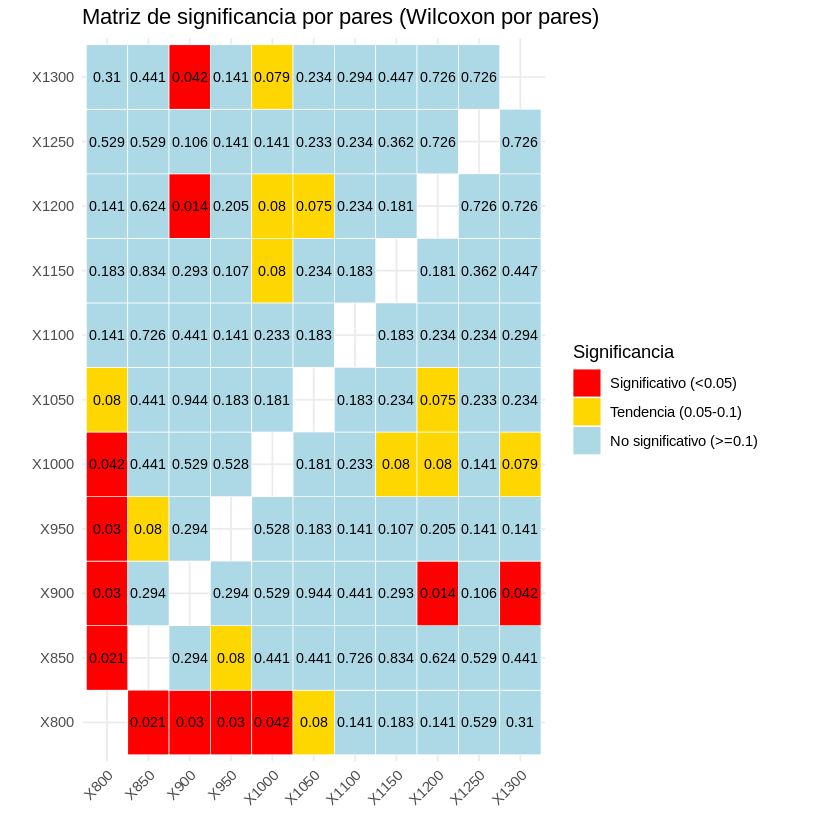

In [11]:
install.packages("reshape2")
library(reshape2)
library(ggplot2)

# Convertir la matriz en data frame largo, eliminando diagonales (NA)
df_long <- melt(matriz_final, na.rm = TRUE)
names(df_long) <- c("Grupo1", "Grupo2", "P_Valor")

# Crear una columna con categorías para colorear
df_long$Significancia <- cut(df_long$P_Valor,
  breaks = c(-Inf, 0.05, 0.1, Inf),
  labels = c("Significativo (<0.05)", "Tendencia (0.05-0.1)", "No significativo (>=0.1)")
)

# Generar el gráfico
ggplot(df_long, aes(x = Grupo1, y = Grupo2, fill = Significancia)) +
  geom_tile(color = "white") +
  geom_text(aes(label = round(P_Valor, 3)), size = 3) +
  scale_fill_manual(values = c(
    "Significativo (<0.05)" = "red",
    "Tendencia (0.05-0.1)" = "gold",
    "No significativo (>=0.1)" = "lightblue"
  )) +
  labs(title = "Matriz de significancia por pares (Wilcoxon por pares)",
       x = "", y = "", fill = "Significancia") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Comparación gráfica de las Ganancias obtenidas optimizando con los pares que tienen p-valor más cercano a 0.05, que son las únicas tendendias interesantes aunque no alcance el umbral de significancia estádística.

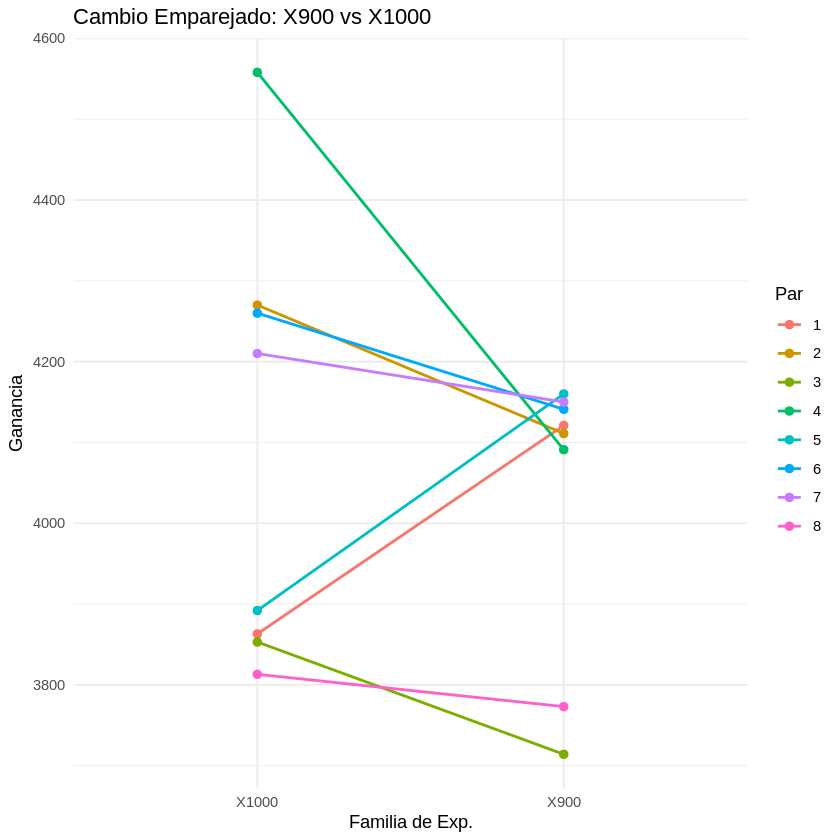

In [20]:
library(tidyr)
library(ggplot2)

# Comparar un par específico (X900 vs X1000 as per title)
df_pareado <- data.frame(
  ID = 1:8, # Corrected ID length to match the data vectors (8 elements)
  `X900` = todos_los_parametros$PARAM_X900,
  `X1000` = todos_los_parametros$PARAM_X1000
)

# Convertir a formato largo para graficar
df_largo <- pivot_longer(df_pareado, cols = c("X900", "X1000"), names_to = "Grupo", values_to = "Valor")

# Dotplot con líneas conectando los puntos emparejados
ggplot(df_largo, aes(x = Grupo, y = Valor, group = ID)) +
  geom_point(aes(color = as.factor(ID)), size = 2) +
  geom_line(aes(color = as.factor(ID)), linewidth = 0.8) +
  labs(title = "Cambio Emparejado: X900 vs X1000",
       x = "Familia de Exp.", y = "Ganancia",
       color = "Par") +
  theme_minimal()

Este gráfico muestra la mediana, rango intercuartílico y posibles outliers de cada Familia de Hiperparametros Optimizados.


Attaching package: ‘tidyr’


The following object is masked from ‘package:reshape2’:

    smiths




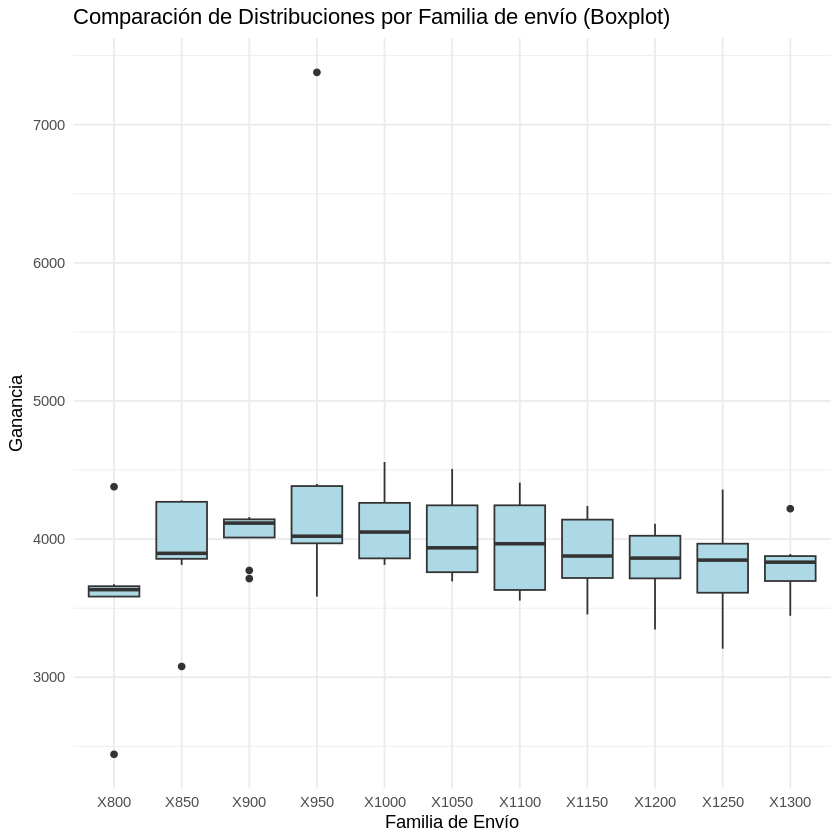

In [12]:
library(tidyr)
library(dplyr)

# Convertir la lista a un data frame largo (long format)
datos_largos <- todos_los_parametros %>%
  as.data.frame() %>%
  pivot_longer(cols = everything(), names_to = "Grupo", values_to = "Valor")

# Limpiar nombres de grupo (quitar "PARAM_")
datos_largos$Grupo <- gsub("PARAM_", "", datos_largos$Grupo)

# Ordenar por HT
datos_largos$Grupo <- factor(datos_largos$Grupo, levels = orden_grupos)

# Generar Boxplot
ggplot(datos_largos, aes(x = Grupo, y = Valor)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Comparación de Distribuciones por Familia de envío (Boxplot)",
       x = "Familia de Envío",
       y = "Ganancia") +
  theme_minimal()


In [16]:
# Cargar librería
library(dplyr)

# Crear el dataframe con los nuevos datos
datos <- data.frame(
  Experimento = c(
    rep("WF63151", 11), rep("WF63153", 11),
    rep("WF63154", 11), rep("WF63155", 11),
    rep("WF63156", 11), rep("WF63157", 11),
    rep("WF63158", 11), rep("WF63159", 11)
  ),
  Ganancia = c(
    3584, 3813, 4121, 3982, 3863, 3783, 4409, 4240, 4111, 4359, 4220,
    3674, 4280, 4111, 7379, 4270, 4508, 4319, 4141, 4002, 3843, 3674,
    3644, 3872, 3714, 4011, 3853, 3723, 3565, 3455, 3346, 3207, 3445,
    3624, 3902, 4091, 3932, 4558, 4438, 4220, 4141, 3932, 3853, 3704,
    4379, 4270, 4160, 4031, 3892, 3773, 3654, 3465, 4091, 3952, 3813,
    3584, 4270, 4141, 4379, 4260, 4180, 4011, 3902, 3793, 3624, 3872,
    3654, 3892, 4150, 4399, 4210, 4091, 3922, 3853, 3723, 3575, 3853,
    2442, 3078, 3773, 3584, 3813, 3694, 3555, 3803, 3694, 4011, 3892
  ),
  Envio = rep(seq(800, 1300, 50), 8)
)

# Paso 1: Calcular estadísticas por experimento
stats <- datos %>%
  group_by(Experimento) %>%
  summarise(
    Ganancia_Media = mean(Ganancia),
    Desviacion_STD = sd(Ganancia),
    Coef_Variacion = (Desviacion_STD / Ganancia_Media) * 100
  ) %>%
  mutate(Ratio_Ganancia_CV = Ganancia_Media / Coef_Variacion)

# Paso 2: Seleccionar el experimento con mejor balance rendimiento/estabilidad
mejor_exp <- stats %>%
  arrange(desc(Ratio_Ganancia_CV)) %>%
  slice(1)

print("📈 Mejor Experimento (óptimo rendimiento y baja dispersión):")
print(mejor_exp)

# Paso 3: Buscar el envío más representativo dentro del mejor WF
datos_mejor_exp <- datos %>%
  filter(Experimento == mejor_exp$Experimento) %>%
  mutate(Distancia_a_la_Media = abs(Ganancia - mejor_exp$Ganancia_Media)) %>%
  arrange(Distancia_a_la_Media)

print(stats)

mejor_envio <- datos_mejor_exp %>% slice(1)

print("📦 Mejor Envío dentro del experimento óptimo:")
print(mejor_envio)


[1] "📈 Mejor Experimento (óptimo rendimiento y baja dispersión):"
# A tibble: 1 × 5
  Experimento Ganancia_Media Desviacion_STD Coef_Variacion Ratio_Ganancia_CV
  <chr>                <dbl>          <dbl>          <dbl>             <dbl>
1 WF63151              4044.           261.           6.46              626.
# A tibble: 8 × 5
  Experimento Ganancia_Media Desviacion_STD Coef_Variacion Ratio_Ganancia_CV
  <chr>                <dbl>          <dbl>          <dbl>             <dbl>
1 WF63151              4044.           261.           6.46              626.
2 WF63153              4382.          1029.          23.5               187.
3 WF63154              3621.           244.           6.75              537.
4 WF63155              4036.           289.           7.16              564.
5 WF63156              3953.           271.           6.85              577.
6 WF63157              4001.           268.           6.70              597.
7 WF63158              3938.           251.        

In [18]:
# Cargar librerías necesarias
library(dplyr)

# Datos base
datos <- data.frame(
  Experimento = c(
    rep("WF63151", 11), rep("WF63153", 11), rep("WF63154", 11), rep("WF63155", 11),
    rep("WF63156", 11), rep("WF63157", 11), rep("WF63158", 11), rep("WF63159", 11)
  ),
  Envio = rep(seq(800, 1300, 50), 8),
  Ganancia = c(
    3584, 3813, 4121, 3982, 3863, 3783, 4409, 4240, 4111, 4359, 4220,
    3674, 4280, 4111, 7379, 4270, 4508, 4319, 4141, 4002, 3843, 3674,
    3644, 3872, 3714, 4011, 3853, 3723, 3565, 3455, 3346, 3207, 3445,
    3624, 3902, 4091, 3932, 4558, 4438, 4220, 4141, 3932, 3853, 3704,
    4379, 4270, 4160, 4031, 3892, 3773, 3654, 3465, 4091, 3952, 3813,
    3584, 4270, 4141, 4379, 4260, 4180, 4011, 3902, 3793, 3624, 3872,
    3654, 3892, 4150, 4399, 4210, 4091, 3922, 3853, 3723, 3575, 3853,
    2442, 3078, 3773, 3584, 3813, 3694, 3555, 3803, 3694, 4011, 3892
  )
)

# Agregar columna de familia
datos <- datos %>%
  mutate(Familia = paste0("X", Envio))

# Calcular estadísticas por familia
stats_por_familia <- datos %>%
  group_by(Familia) %>%
  summarise(
    Media = mean(Ganancia),
    SD = sd(Ganancia),
    CV = SD / Media
  ) %>%
  arrange(CV)

print("📊 Estadísticas por Familia de Envío:")
print(stats_por_familia)

# Filtrar familia X900
x900 <- datos %>%
  filter(Familia == "X900") %>%
  arrange(desc(Ganancia))

# Calcular estadísticas específicas para X900
media_x900 <- mean(x900$Ganancia)
sd_x900 <- sd(x900$Ganancia)
cv_x900 <- sd_x900 / media_x900

cat("\n✅ Estadísticas para familia X900:\n")
cat("Media:", round(media_x900, 2), "\n")
cat("Desviación estándar:", round(sd_x900, 2), "\n")
cat("Coeficiente de variación (CV):", round(cv_x900, 4), "\n")

cat("\n🏆 Mejor WF dentro de X900:\n")
print(x900[1, ])


[1] "📊 Estadísticas por Familia de Envío:"
# A tibble: 11 × 4
   Familia Media    SD     CV
   <chr>   <dbl> <dbl>  <dbl>
 1 X900    4033.  180. 0.0448
 2 X1300   3809.  222. 0.0582
 3 X1200   3836.  254. 0.0663
 4 X1000   4090.  272. 0.0665
 5 X1150   3875   299. 0.0772
 6 X1050   4024.  328. 0.0816
 7 X1100   3957.  341. 0.0863
 8 X1250   3803   342. 0.0899
 9 X850    3922.  396. 0.101 
10 X800    3573.  528. 0.148 
11 X950    4462. 1207. 0.270 

✅ Estadísticas para familia X900:
Media: 4032.62 
Desviación estándar: 180.49 
Coeficiente de variación (CV): 0.0448 

🏆 Mejor WF dentro de X900:
  Experimento Envio Ganancia Familia
1     WF63156   900     4160    X900
